In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')

In [5]:
df_2015.columns = ['Country','Region','Happiness Rank','Happiness Score','STD','GDP','Family','Health','Freedom','Corruption','Generosity','Dystopia']

In [6]:
df_2015 = df_2015.drop(['STD','Dystopia'],axis=1)

In [7]:
df_2016.columns = ['Country','Region','Happiness Rank','Happiness Score','STD1','STD2','GDP','Family','Health','Freedom','Corruption','Generosity','Dystopia']

In [8]:
df_2016 = df_2016.drop(['STD1','STD2','Dystopia'],axis=1)

In [9]:
df_2017.columns = ['Country','Happiness Rank','Happiness Score','STD1','STD2','GDP','Family','Health','Freedom','Generosity','Corruption','Dystopia']

In [10]:
df_2017 = df_2017.drop(['STD1','STD2','Dystopia'],axis=1)

In [11]:
df_2017 = df_2017.merge(df_2016[['Country','Region']],on='Country',how='left')

In [12]:
df_2018.columns = ['Happiness Rank','Country','Happiness Score','GDP','Family','Health','Freedom','Generosity','Corruption']

In [13]:
df_2018 = df_2018.merge(df_2016[['Country','Region']],on='Country',how='left')

In [14]:
df_2019.columns = ['Happiness Rank','Country','Happiness Score','GDP','Family','Health','Freedom','Generosity','Corruption']

In [15]:
df_2019 = df_2019.merge(df_2016[['Country','Region']],on='Country',how='left')

In [16]:
df = pd.concat([df_2015,df_2016,df_2017,df_2018,df_2019])

In [17]:
df = df.dropna()

In [18]:
df = df.groupby(['Country','Region']).mean()

In [19]:
df = df.reset_index()

In [20]:
df = df.drop(['Country', 'Happiness Rank'],axis=1)

In [21]:
df

,Region,Happiness Score,GDP,Family,Health,Freedom,Corruption,Generosity
0,Southern Asia,3.51280,0.357113,0.409753,0.254707,0.117924,0.058094,0.267730
1,Central and Eastern Europe,4.71260,0.938633,0.754931,0.787696,0.371898,0.043201,0.167887
2,Middle East and Northern Africa,5.66760,1.012963,1.074205,0.665057,0.178437,0.146099,0.069219
3,Sub-Saharan Africa,3.87225,0.798380,0.938368,0.133902,0.027433,0.071570,0.105269
4,Latin America and Caribbean,6.45940,1.111035,1.330960,0.760895,0.481620,0.064308,0.092371
...,...,...,...,...,...,...,...,...
159,Latin America and Caribbean,5.53140,1.052468,1.323264,0.683741,0.213709,0.071444,0.057186
160,Southeastern Asia,5.15460,0.723416,1.138384,0.722700,0.577207,0.091921,0.195664
161,Middle East and Northern Africa,3.62580,0.489313,0.865448,0.365440,0.244175,0.067045,0.096929
162,Sub-Saharan Africa,4.58440,0.571761,0.932381,0.302761,0.462099,0.097337,0.218430


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           164 non-null    object 
 1   Happiness Score  164 non-null    float64
 2   GDP              164 non-null    float64
 3   Family           164 non-null    float64
 4   Health           164 non-null    float64
 5   Freedom          164 non-null    float64
 6   Corruption       164 non-null    float64
 7   Generosity       164 non-null    float64
dtypes: float64(7), object(1)
memory usage: 10.4+ KB


In [23]:
df.describe()

,Happiness Score,GDP,Family,Health,Freedom,Corruption,Generosity
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,5.384550,0.903308,1.067247,0.602577,0.412297,0.129764,0.221430
std,1.099245,0.409405,0.279457,0.242303,0.145737,0.104723,0.116573
min,3.079000,0.005661,0.000000,0.049513,0.027433,0.001654,0.000000
25%,4.442850,0.570993,0.934900,0.416294,0.317728,0.060231,0.138687
50%,5.317000,0.972478,1.101318,0.663678,0.432305,0.097550,0.208368
75%,6.153450,1.234365,1.305038,0.773564,0.512431,0.156909,0.280948
max,7.546000,1.743691,1.492813,1.029513,0.655988,0.473468,0.723533


In [24]:
df.isna().sum()

Region             0
Happiness Score    0
GDP                0
Family             0
Health             0
Freedom            0
Corruption         0
Generosity         0
dtype: int64

In [25]:
df.isnull().sum()

Region             0
Happiness Score    0
GDP                0
Family             0
Health             0
Freedom            0
Corruption         0
Generosity         0
dtype: int64

In [26]:
def status(x):
    if(x<5):
        return "Infeliz"
    else:
        return "Feliz"

In [27]:
df['Status'] = df['Happiness Score'].apply(status)
df.head(50)

,Region,Happiness Score,GDP,Family,Health,Freedom,Corruption,Generosity,Status
0,Southern Asia,3.512800,0.357113,0.409753,0.254707,0.117924,0.058094,0.267730,Infeliz
1,Central and Eastern Europe,4.712600,0.938633,0.754931,0.787696,0.371898,0.043201,0.167887,Infeliz
2,Middle East and Northern Africa,5.667600,1.012963,1.074205,0.665057,0.178437,0.146099,0.069219,Feliz
3,Sub-Saharan Africa,3.872250,0.798380,0.938368,0.133902,0.027433,0.071570,0.105269,Infeliz
4,Latin America and Caribbean,6.459400,1.111035,1.330960,0.760895,0.481620,0.064308,0.092371,Feliz
5,Central and Eastern Europe,4.393200,0.839133,0.890873,0.697851,0.216029,0.038767,0.082394,Infeliz
6,Australia and New Zealand,7.276200,1.394885,1.409006,0.914529,0.605043,0.314573,0.416078,Feliz
7,Western Europe,7.142000,1.398341,1.363963,0.883680,0.576929,0.214260,0.292400,Feliz
8,Central and Eastern Europe,5.229200,1.073644,1.031750,0.619653,0.380545,0.175756,0.049132,Feliz
9,Middle East and Northern Africa,6.113800,1.390482,1.243464,0.725251,0.519083,0.210752,0.203152,Feliz


In [28]:
df.to_csv("Happiness_report_2015-2019.csv")

In [29]:
df = df.drop('Happiness Score',axis=1)

In [28]:
df.head(1)

,Region,GDP,Family,Health,Freedom,Corruption,Generosity,Status
0,Southern Asia,0.357113,0.409753,0.254707,0.117924,0.058094,0.26773,Infeliz


### Colunas em texto serão convertidas de variáveis categóricas para numéricas

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
enconder = LabelEncoder()

In [31]:
df['Status'] = enconder.fit_transform(df['Status'])

In [32]:
enconder.classes_

array(['Feliz', 'Infeliz'], dtype=object)

In [33]:
df.head()

,Region,GDP,Family,Health,Freedom,Corruption,Generosity,Status
0,Southern Asia,0.357113,0.409753,0.254707,0.117924,0.058094,0.267730,1
1,Central and Eastern Europe,0.938633,0.754931,0.787696,0.371898,0.043201,0.167887,1
2,Middle East and Northern Africa,1.012963,1.074205,0.665057,0.178437,0.146099,0.069219,0
3,Sub-Saharan Africa,0.798380,0.938368,0.133902,0.027433,0.071570,0.105269,1
4,Latin America and Caribbean,1.111035,1.330960,0.760895,0.481620,0.064308,0.092371,0


In [34]:
colunas = ['GDP', 'Family', 'Freedom', 'Corruption', 'Generosity']

In [35]:
colunas

['GDP', 'Family', 'Freedom', 'Corruption', 'Generosity']

### Normalização de dados

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc=StandardScaler()

In [38]:
for col in colunas:
    df[col] = sc.fit_transform(df[col].values.reshape(-1,1))

In [39]:
df.head()

,Region,GDP,Family,Health,Freedom,Corruption,Generosity,Status
0,Southern Asia,-1.338202,-2.359964,0.254707,-2.026085,-0.686475,0.398393,1
1,Central and Eastern Europe,0.086547,-1.121005,0.787696,-0.278056,-0.829122,-0.460718,1
2,Middle East and Northern Africa,0.268660,0.024977,0.665057,-1.609590,0.156468,-1.309708,0
3,Sub-Saharan Africa,-0.257079,-0.462589,0.133902,-2.648912,-0.557393,-0.999515,1
4,Latin America and Caribbean,0.508942,0.946554,0.760895,0.477130,-0.626952,-1.110494,0


In [40]:
dummies = pd.get_dummies(df.Region)

In [41]:
df_bin = pd.concat([df,dummies], axis='columns')

In [42]:
df_bin.head()

,Region,GDP,Family,Health,Freedom,Corruption,Generosity,Status,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,Southern Asia,-1.338202,-2.359964,0.254707,-2.026085,-0.686475,0.398393,1,0,0,0,0,0,0,0,1,0,0
1,Central and Eastern Europe,0.086547,-1.121005,0.787696,-0.278056,-0.829122,-0.460718,1,0,1,0,0,0,0,0,0,0,0
2,Middle East and Northern Africa,0.268660,0.024977,0.665057,-1.609590,0.156468,-1.309708,0,0,0,0,0,1,0,0,0,0,0
3,Sub-Saharan Africa,-0.257079,-0.462589,0.133902,-2.648912,-0.557393,-0.999515,1,0,0,0,0,0,0,0,0,1,0
4,Latin America and Caribbean,0.508942,0.946554,0.760895,0.477130,-0.626952,-1.110494,0,0,0,0,1,0,0,0,0,0,0


# Analisando cada um dos critérios de felicidade


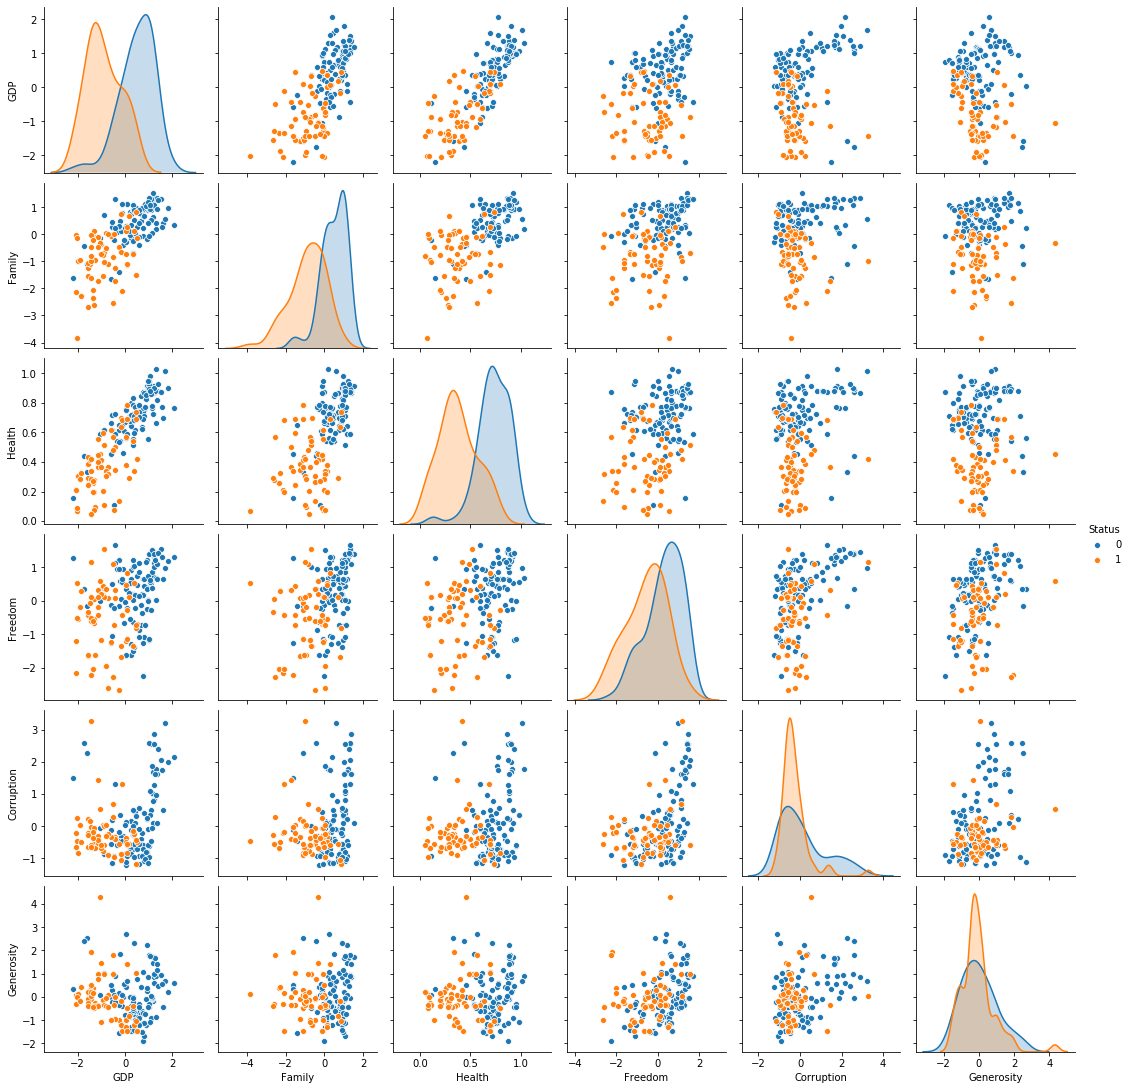

In [43]:
sns.pairplot(df, hue='Status')

Os fatores "Health" e "GDP" são os que melhor separam as classes "Infeliz" e "Feliz".

### Correlação

In [44]:
correlacao = df_bin.corr()

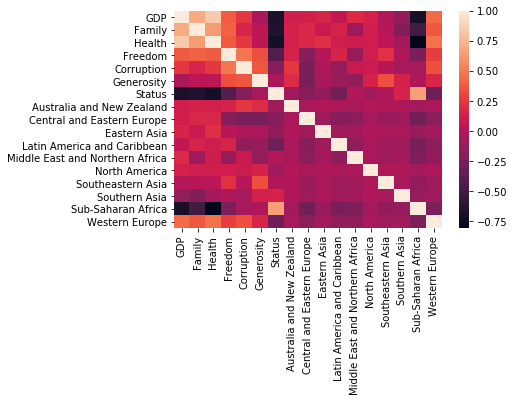

In [45]:
sns.heatmap(correlacao)

GDP & Health demonstram alguma correlação. Ou seja, podemos considerar que quanto maior o produto interno bruto de uma região,
maior será a satisfação com relação à saúde de seus habitantes.

### Proporção de regiões Infelizes x Felizes

In [46]:
df['Status'].value_counts()

0    104
1     60
Name: Status, dtype: int64

In [47]:
classes = df['Status'].unique()
n_classes = len(classes)

### Distribuição de dados cadastrados por região.

In [48]:
df['Region'].value_counts()

Sub-Saharan Africa                 44
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

### Analisando a pontuação de felicidade por região.

Observamos que de forma massiva, os paízes com menor pontuação se encontram na região Sub-Saharan Africa. Enquanto 4 regiões se destacaram por não possuírem registros de países infelizes:
Sub-Saharan Africa, Western Europe, Eastern Asia, Australia and New Zealand e North America.         

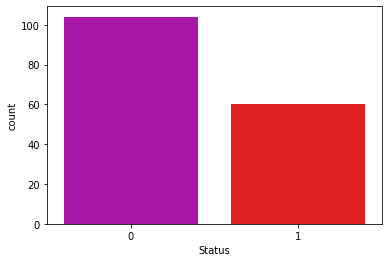

In [49]:
sns.countplot(x='Status', palette=["m", "r"],data=df)

### "Felizes" = 0                "Infelizes" = 1

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

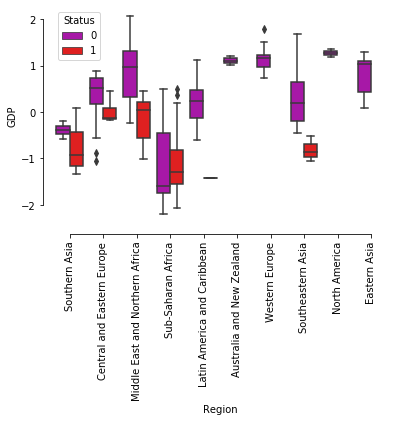

In [50]:
sns.boxplot(x="Region", y="GDP", hue="Status", palette=["m", "r"], data=df)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)

Também observa-se que quanto maior o GDP, menor o índice de infelicidade entre as regiões.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

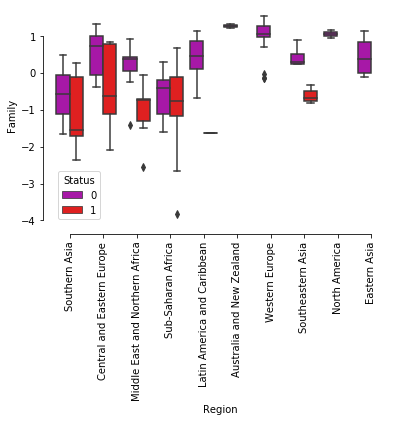

In [51]:
sns.boxplot(x="Region", y="Family", hue="Status", palette=["m", "r"], data=df)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)


Neste gráfico, nota-se que Ainda que as regiões com alto índice de infelicidade ainda podem considerar-se satisfeitos com o critério "Família"

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

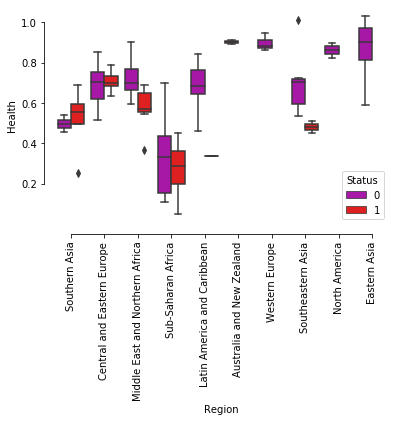

In [52]:
sns.boxplot(x="Region", y="Health", hue="Status", palette=["m", "r"], data=df)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)

A saúde mostra-se um fator importante na definição das categorias. Quanto menor a satisfação com a saúde, menor é o índice de felicidade.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

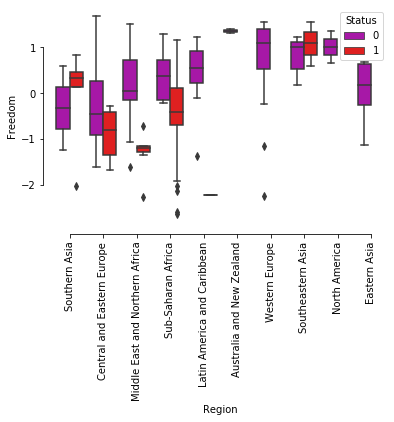

In [53]:
sns.boxplot(x="Region", y="Freedom", hue="Status", palette=["m", "r"], data=df)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)

A liberdade não demonstra-se um fator relevante para determinar-se se uma região é ou não feliz. Pois países infelizes indicam ter maior satisfação com relação ao critério "Liberdade".

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

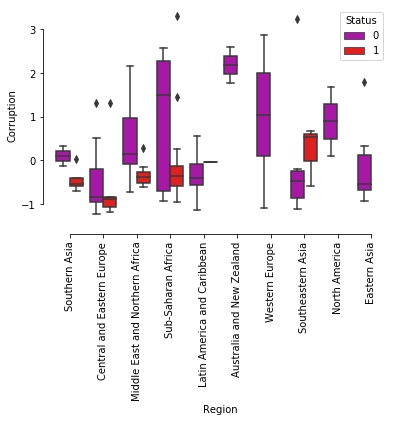

In [54]:
sns.boxplot(x="Region", y="Corruption", hue="Status", palette=["m", "r"], data=df)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)

Da mesma forma quando analisamos os mais infelizes, identificamos que existem uma grande quandidade de regiões infelizes com pouca corrupção.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

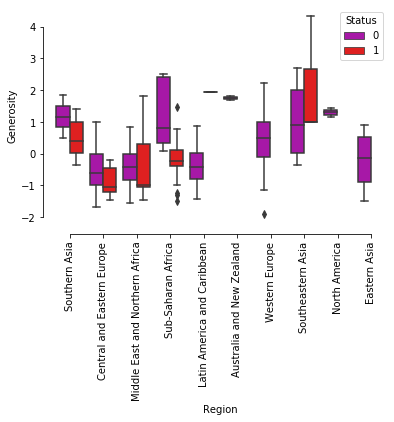

In [55]:
sns.boxplot(x="Region", y="Generosity", hue="Status", palette=["m", "r"], data=df)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)

A generosidade também mostra-se pouco relevante para a definição das categorias, Feliz ou Infeliz

### Uma rápida representação do posicionamento geográfico da região menos feliz.

<img src="https://www.eoi.es/blogs/lauraambros/files/2012/01/Map_-_Africa_LRG.jpg" alt="HTML tutorial" width="600" height="600" />

"https://www.eoi.es/blogs/lauraambros/files/2012/01/Map_-_Africa_LRG.jpg"

Obs.: É importante ressaltar que a grande quantidade de dados em regiões infelizes, faz com que a média de nossos dados seja puxada para baixo. Portando, entendo que os dados estão desbalanceados, se contrastados com regiões com poucos registros de dados na pesquisa.

### Separando variáveis X e Y

In [56]:
df=df_bin.drop('Region', axis=1)

In [57]:
X = df.drop(['Status'], axis=1).values
Y = df['Status'].values

In [58]:
X

array([[-1.3382022 , -2.35996374,  0.25470736, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.08654739, -1.12100464,  0.78769595, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.26866028,  0.02497667,  0.66505693, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.01430773, -0.72432123,  0.36544018, ...,  0.        ,
         0.        ,  0.        ],
       [-0.81230456, -0.48407657,  0.30276118, ...,  0.        ,
         1.        ,  0.        ],
       [-1.37020506, -0.21363592,  0.27440275, ...,  0.        ,
         1.        ,  0.        ]])

In [59]:
Y

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

### Separando em amostras de treino e teste

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_treino,X_teste,Y_treino,Y_teste=train_test_split(X,Y,test_size=0.25,random_state=42)

# RandomForest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
modelo = RandomForestClassifier()

In [64]:
modelo.fit(X_treino,Y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Determinando acurácia na amostra de treino

In [65]:
score_treino = modelo.score(X_treino,Y_treino)

In [66]:
score_treino


1.0

### Prevendo amostras de teste

In [67]:
Y_previsto = modelo.predict(X_teste)

In [68]:
score_teste = modelo.score(X_teste,Y_teste)

In [69]:
score_teste


0.9512195121951219

### Confusion Matrix

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
cm=confusion_matrix(Y_teste,Y_previsto)


In [72]:
cm


array([[23,  1],
       [ 1, 16]], dtype=int64)

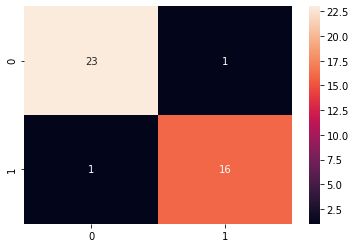

In [73]:
sns.heatmap(cm,annot=True, fmt="d")

Neste caso, observa-se que o modelo mostrou um desempenho muito bom quando comparado com seus erros

In [74]:
from sklearn.metrics import classification_report,f1_score,precision_score,average_precision_score,recall_score,accuracy_score

In [75]:
cr = classification_report(Y_teste,Y_previsto,labels=[0,1])
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.94      0.94      0.94        17

    accuracy                           0.95        41
   macro avg       0.95      0.95      0.95        41
weighted avg       0.95      0.95      0.95        41



### F1-score

In [76]:
f1 = f1_score(Y_teste,Y_previsto)
print("F1 score = {:0.2f}%".format(f1*100))

F1 score = 94.12%


### Precision Score

In [77]:
precisao = precision_score(Y_teste,Y_previsto)
print("Precision score = {:0.2f}%".format(precisao*100))

Precision score = 94.12%


### Average precision score

In [78]:
avg_precision = average_precision_score (Y_teste,Y_previsto)
print("Averaged Precision Score = {:0.2f}%".format(avg_precision*100))

Averaged Precision Score = 91.02%


### Recall score

In [79]:
rec = recall_score (Y_teste,Y_previsto)
print("Recall score = {:0.2f}%".format(rec*100))

Recall score = 94.12%


### Accuracy Score

In [80]:
acc = accuracy_score (Y_teste,Y_previsto)
print("Recall score = {:0.2f}%".format(acc*100))

Recall score = 95.12%


O modelo atual apresentou uma boa precisão indicando que o seu uso pode ser adequado dada ao baixo nível
de criticidade desta análise.  

## **Curva ROC**


In [81]:
from sklearn.metrics import roc_curve, roc_auc_score

In [82]:
roc_score = roc_auc_score(Y_teste, Y_previsto)
print("ROC score = {:.2f}%".format(roc_score*100))

ROC score = 94.98%


In [83]:
roc_fpr, roc_tpr, _ = roc_curve(Y_teste, Y_previsto)

Text(0, 0.5, 'True Positive Rate')

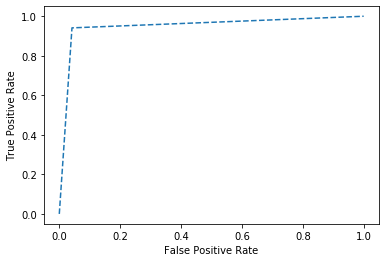

In [84]:
plt.plot(roc_fpr, roc_tpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### **Curva Precision-Recall**

In [85]:
from sklearn.metrics import precision_recall_curve,auc

In [86]:
rf_precision, rf_recall, _ = precision_recall_curve(Y_teste, Y_previsto)
rf_auc = auc(rf_recall, rf_precision)

In [87]:
print("AUC score = {:0.2f}%".format(rf_auc*100))

AUC score = 95.34%


Text(0, 0.5, 'Precision')

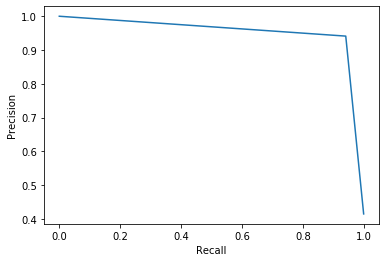

In [88]:
plt.plot(rf_recall, rf_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

# Regressão logística

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
modelo_log = LogisticRegression()

In [91]:

modelo_log.fit(X_treino,Y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
Y_previsto_log = modelo_log.predict(X_teste)

In [93]:
cm_log =confusion_matrix(Y_teste,Y_previsto_log)
cm_log

array([[23,  1],
       [ 4, 13]], dtype=int64)

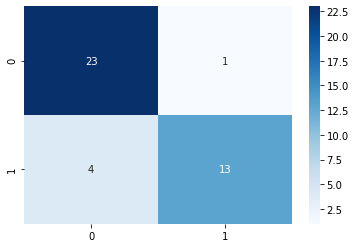

In [94]:
sns.heatmap(cm_log,annot=True, fmt="d", cmap="Blues")

In [95]:
cr_log = classification_report(Y_teste,Y_previsto_log,labels=[0,1])
print(cr_log)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        24
           1       0.93      0.76      0.84        17

    accuracy                           0.88        41
   macro avg       0.89      0.86      0.87        41
weighted avg       0.88      0.88      0.88        41



### F1-score

In [96]:
f1_log = f1_score(Y_teste,Y_previsto_log)
print("F1 score = {:0.2f}%".format(f1_log*100))

F1 score = 83.87%


### Precision Score

In [97]:
precisao_log = precision_score(Y_teste,Y_previsto_log)
print("Precision score = {:0.2f}%".format(precisao_log*100))

Precision score = 92.86%


### Average precision score


In [98]:
avg_precision_log = average_precision_score(Y_teste,Y_previsto_log)
print("Averaged Precision score = {:0.2f}%".format(avg_precision_log*100))

Averaged Precision score = 80.76%


### Recall score


In [99]:
rec_log = recall_score(Y_teste,Y_previsto_log)
print("Recall score = {:0.2f}%".format(rec_log*100))

Recall score = 76.47%


### Accuracy Score

In [100]:
acc_log = accuracy_score(Y_teste,Y_previsto)
print("Accuracy score = {:0.2f}%".format(acc_log*100))

Accuracy score = 95.12%


# Curva ROC (Regressão Logística)

In [101]:
roc_score_log = roc_auc_score(Y_teste, Y_previsto_log)
print("ROC score = {:0.2f}%".format(roc_score_log*100))

ROC score = 86.15%


In [102]:
roc_fpr_log, roc_tpr_log, _ = roc_curve(Y_teste, Y_previsto_log)

Text(0, 0.5, 'True Positive Rate')

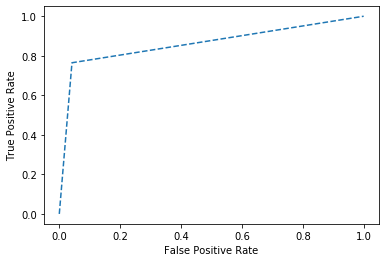

In [103]:
log_plt = plt.plot(roc_fpr_log, roc_tpr_log, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [104]:
lr_precision_log, lr_recall_log, _ = precision_recall_curve(Y_teste, Y_previsto)
lr_auc_log = auc(lr_recall_log, lr_precision_log)

In [105]:
print("AUC score = {:0.2f}%".format(lr_auc_log*100))

AUC score = 95.34%


Text(0, 0.5, 'Precision')

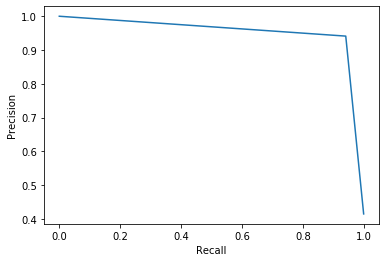

In [106]:
plt.plot(lr_recall_log, lr_precision_log)
plt.xlabel('Recall')
plt.ylabel('Precision')

## Comparando modelos

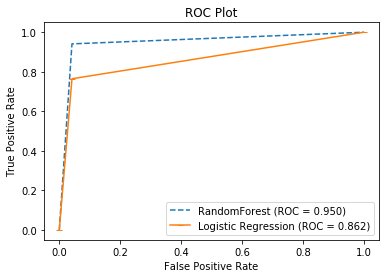

In [107]:
plt.plot(roc_fpr, roc_tpr, linestyle='--', label='RandomForest (ROC = %0.3f)' % roc_score )
plt.plot(roc_fpr_log, roc_tpr_log, marker='_', label='Logistic Regression (ROC = %0.3f)' % roc_score_log)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [108]:
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.94      0.94      0.94        17

    accuracy                           0.95        41
   macro avg       0.95      0.95      0.95        41
weighted avg       0.95      0.95      0.95        41



In [109]:
print(cr_log)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        24
           1       0.93      0.76      0.84        17

    accuracy                           0.88        41
   macro avg       0.89      0.86      0.87        41
weighted avg       0.88      0.88      0.88        41



<!DOCTYPE html>
<html>
  <head>
    <!-- ... -->
  </head>
  <body>
    <figure>
          <embed type="image/svg+xml" src="http://localhost:8888/files/TCC%20-%20World%20Hapiness%20Report%202015-2019/bar_chart.svg" />
    </figure>
  </body>
</html>

Persistindo o melhor modelo em disco

In [110]:
#from sklearn.externals import joblib
import pickle
pickle.dump(modelo, open('modelo2.plk', 'wb'), protocol=4)

In [111]:
ls

 O volume na unidade C é SISTEMA
 O Número de Série do Volume é 4CAF-AC82

 Pasta de C:\Users\Ale Souza\TCC - World Hapiness Report 2015-2019

14/09/2020  09:02    <DIR>          .
14/09/2020  09:02    <DIR>          ..
14/09/2020  00:31    <DIR>          .ipynb_checkpoints
19/07/2020  11:16            16.557 2015.csv
19/07/2020  11:16            17.132 2016.csv
19/07/2020  11:16            29.536 2017.csv
19/07/2020  11:16             8.809 2018.csv
19/07/2020  11:16             8.822 2019.csv
11/09/2020  22:12            17.322 bar_chart.svg
13/09/2020  15:07             5.282 Flask Primeiros passos.ipynb
02/08/2020  20:40            34.960 Happiness.ipynb
14/09/2020  00:40             4.848 importação - modelo.ipynb
14/09/2020  00:16           228.485 modelo.pkl
14/09/2020  09:03           225.917 modelo2.plk
13/09/2020  15:05               156 primeiro_app.html
10/09/2020  18:51           628.119 Projeto_Alessandro_09-09-2020 (1).ipynb
14/09/2020  09:02           741.403 Projeto_Al